In [1]:
import urllib.request
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import numpy as np
headers = ['date','cases','deaths']
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
data = pd.read_csv(url)
#print(data)


In [2]:
##Create new columns with daily new cases and deaths and 7 day averages
data.loc[data.index[0],'Daily_New_Cases']=0
data.loc[data.index[0],'Daily_Deaths']=0

idx = data.columns.get_loc('cases')
for i in range(1,data.shape[0]-1):
   data.loc[data.index[i],'Daily_New_Cases']=data.iloc[i,idx]-data.iloc[i-1,idx]

idx = data.columns.get_loc('Daily_New_Cases')
for i in range(3,data.shape[0]-3):
    data.loc[data.index[i],'Cases_7-Day_CMA']=(data.iloc[i-3,idx]+data.iloc[i-2,idx]+data.iloc[i-1,idx]+data.iloc[i,idx]+data.iloc[i+1,idx]+data.iloc[i+2,idx]+data.iloc[i+3,idx])/7

idx = data.columns.get_loc('deaths')
for i in range(1,data.shape[0]-1):
   data.loc[data.index[i],'Daily_Deaths']=data.iloc[i,idx]-data.iloc[i-1,idx]

idx = data.columns.get_loc('Daily_Deaths')
for i in range(3,data.shape[0]-3):
    data.loc[data.index[i],'Deaths_7-Day_CMA']=(data.iloc[i-3,idx]+data.iloc[i-2,idx]+data.iloc[i-1,idx]+data.iloc[i,idx]+data.iloc[i+1,idx]+data.iloc[i+2,idx]+data.iloc[i+3,idx])/7


    


(258, 7)


Text(0, 0.5, 'Daily Deaths')

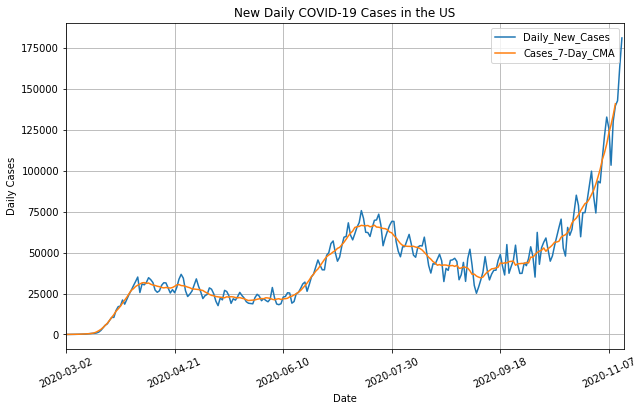

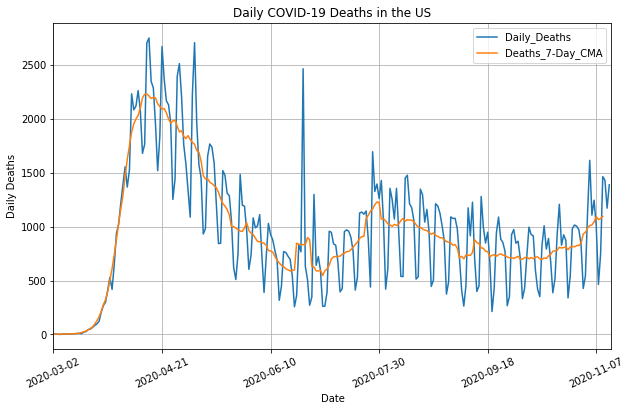

In [3]:
##Cut out early times with few cases and plot
mask = (data['date']>'2020-03-01')
df = data[mask]
print(df.shape)
ax=df.plot(x='date',y=['Daily_New_Cases','Cases_7-Day_CMA'],title='New Daily COVID-19 Cases in the US',grid=True, rot=25, figsize=[10,6])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Cases")
ax2=df.plot(x='date',y=['Daily_Deaths','Deaths_7-Day_CMA'],title='Daily COVID-19 Deaths in the US',grid=True, rot=25, figsize=[10,6])
ax2.set_xlabel("Date")
ax2.set_ylabel("Daily Deaths")

